In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import load_config
import yfinance as yf
import numpy as np
from src.logger import logger


class Var:
    def __init__(self,config):
        self.config = config
        self.stock_data = None
        self.returns = None
        self.var = None
        self.cvar = None

        
    def load_data(self):
        """
        Loads in data from yfinance
        """
        self.stock_data = yf.download(self.config['stock_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
        self.stock_data = self.stock_data.dropna()
        return self.stock_data
    
    def get_returns(self):
        if self.stock_data is None:
            self.load_data()
            
        self.returns = self.stock_data.pct_change().dropna()
        return self.returns
    
    def get_var(self,ci=0.95):
        """
        value at risk
        """
        if self.stock_data is None:
            self.load_data()

        self.value_at_risk = np.percentile(self.returns,(1 - ci)*100)
        return self.value_at_risk
    
    def get_cvar(self,ci=0.95):
        """
        Conditional Value at Risk
        """
        if self.stock_data is None:
            self.load_data()


        tail_risk = self.returns[self.returns < self.value_at_risk]
        self.cvar = np.mean(tail_risk)
        return self.cvar
    
    def plot_returns(self):
        """
        Args:
          plots VaR, Returns, and cvar
          """
        if self.stock_data is None:
            self.load_data()
        print(f' Returns: {self.returns}')
        print(f'Value at Risk: {self.value_at_risk}')
        print(f'Conditional Value at Risk: {self.cvar:.4}%')
        plt.figure(figsize=(10, 6))
        plt.hist(self.returns, bins=100, label="Returns Distribution", alpha=0.7)
        plt.axvline(self.value_at_risk, color='r', linestyle='dashed', linewidth=2, label=f'VaR (5%): {self.value_at_risk:.4f}')
        plt.axvline(x=self.cvar, color='green', linestyle='--', label=f'CVaR ({self.cvar:.4f}%)')
        plt.title('Distribution of Returns and Value at Risk')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
        plt.show()


In [2]:
if __name__ == "__main__":
    config = load_config()
    var_config = Var(config)
    var_config.load_data()


/tmp/ipykernel_8197/3633724179.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.stock_data = yf.download(self.config['stock_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  17 of 17 completed


In [3]:
var_config.get_returns()

Ticker,AAPL,BLCN,F,GM,GOOGL,IBM,MCD,META,MSFT,RGTI,SBUX,T,TGT,TSLA,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,
2021-04-23,0.018039,0.011506,0.023451,0.015355,0.021048,0.008140,0.006954,0.015547,0.015476,0.001010,0.014148,0.001276,0.002140,0.013492,0.000349,0.008368,0.001646
2021-04-26,0.002978,0.006412,0.004092,0.011820,0.004348,-0.006038,-0.009677,0.006343,0.001532,0.000000,-0.013950,-0.015605,-0.011553,0.012065,-0.006283,-0.005469,-0.014224
2021-04-27,-0.002449,0.000822,0.017930,0.013056,-0.008204,0.003108,0.011493,0.001749,0.001606,0.000000,0.001984,-0.004530,0.003585,-0.045326,-0.010889,-0.004172,0.003408
2021-04-28,-0.006027,0.001232,-0.004804,-0.007122,0.029708,0.006971,-0.010937,0.011628,-0.028286,0.000000,-0.032286,0.006175,0.000489,-0.014672,0.001953,-0.002095,-0.003541
2021-04-29,-0.000749,-0.002256,-0.094127,-0.033817,0.014294,0.008671,0.012048,0.072973,-0.008053,0.002018,0.019840,0.012274,0.014281,-0.025058,0.015772,0.006488,0.012619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-21,-0.004911,-0.006187,-0.013925,-0.004580,0.002157,-0.012987,0.000447,-0.011528,-0.001287,-0.033198,-0.010613,0.005464,-0.016516,-0.011701,-0.000666,-0.000820,-0.044945
2025-08-22,0.012717,0.023401,0.036187,0.032915,0.031740,0.011236,0.002714,0.021229,0.005930,0.038542,-0.002033,-0.022758,0.022460,0.062166,-0.013102,-0.009844,-0.011535
2025-08-25,-0.002634,-0.001468,0.006814,-0.001542,0.011645,-0.010988,-0.002006,-0.001974,-0.005855,-0.023617,-0.029079,-0.001043,-0.021262,0.019382,-0.004725,-0.008285,-0.007849


In [6]:
var_config.get_var()

np.float64(-0.03575229824915763)

In [7]:
var_config.get_cvar()

np.float64(-0.06169167923845347)

 Returns: Ticker          AAPL      BLCN         F        GM     GOOGL       IBM  \
Date                                                                     
2021-04-23  0.018039  0.011506  0.023451  0.015355  0.021048  0.008140   
2021-04-26  0.002978  0.006412  0.004092  0.011820  0.004348 -0.006038   
2021-04-27 -0.002449  0.000822  0.017930  0.013056 -0.008204  0.003108   
2021-04-28 -0.006027  0.001232 -0.004804 -0.007122  0.029708  0.006971   
2021-04-29 -0.000749 -0.002256 -0.094127 -0.033817  0.014294  0.008671   
...              ...       ...       ...       ...       ...       ...   
2025-08-21 -0.004911 -0.006187 -0.013925 -0.004580  0.002157 -0.012987   
2025-08-22  0.012717  0.023401  0.036187  0.032915  0.031740  0.011236   
2025-08-25 -0.002634 -0.001468  0.006814 -0.001542  0.011645 -0.010988   
2025-08-26  0.009465 -0.008613  0.001692  0.008922 -0.006475  0.013365   
2025-08-27  0.005146  0.006357  0.005912 -0.000850  0.001641  0.009108   

Ticker           MCD      M

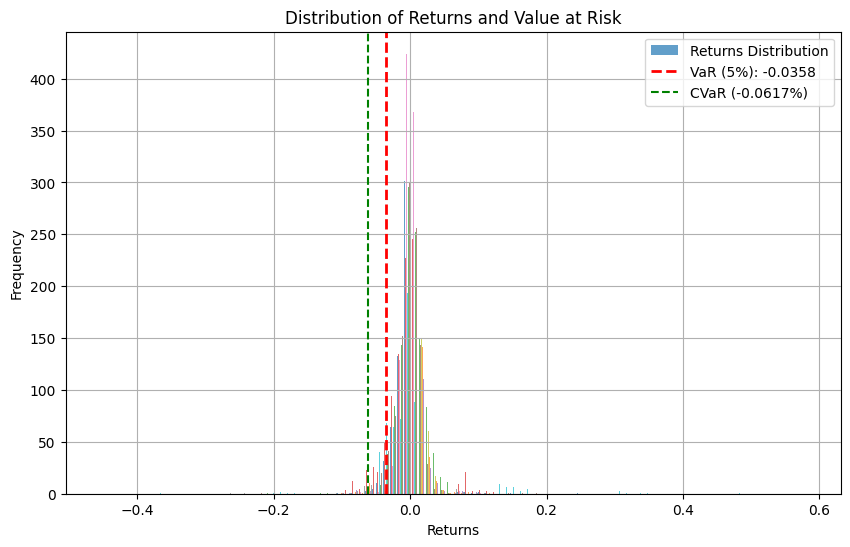

In [8]:
var_config.plot_returns()